# **Vancouver Datajam 2024 - Problematic Internet Use in Children**
### Notebook 1 - October 25, 2024


We’re using Google Colab to make it **easy for everyone to work together and interact in real-time.** The code chunks below handle the setup, including installing required packages and loading the dataset. You can continue with data and analysis here or on other platforms like GitHub, depending on the teams preference.

**Objective: Understand the risk factors of internet usage**


### Setup Package and Dataset Download

---



In [434]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [435]:
# Install gdown
# pip install --upgrade gdown

In [436]:
# Import necessary libraries
import gdown
import pandas as pd

In [437]:


# Setup for Google Drive File Download [Only need to run once]

# Define the Google Drive file ID and destination
file_id = '1v-EhRVKdTnwaTXe0ptFfMcKQyJehP6j8'  # Your actual FILE_ID
destination = 'start_here.csv'  # The desired filename in Colab environment

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the dataset
gdown.download(download_url, destination, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1v-EhRVKdTnwaTXe0ptFfMcKQyJehP6j8
To: /content/start_here.csv
100%|██████████| 697k/697k [00:00<00:00, 32.4MB/s]


'start_here.csv'

## Inital Load of the Dataset

---



In [438]:
# Dataset
# Load the dataset into pandas
df = pd.read_csv(destination)

# Display the first few rows
df.head()

,Unnamed: 0,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
4,4,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0


# EDA Process
---
From here, feel free to make any needed changes for data exploration.  
Please add your name above the code chunk you’re creating or leave a comment on the chunk with your name and the time (to help keep track).  
It’s also a good practice to create a duplicate of the dataset before making changes like imputations.

To add code chunks ➔ click **+Code**  
To add text chunks ➔ click **+Text**





In [439]:
# prompt: from this point on, we can start our eda process with the dataset.

# Display some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              2736 non-null   int64  
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    floa

In [440]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
Basic_Demos-Enroll_Season,0
Basic_Demos-Age,0
Basic_Demos-Sex,0
CGAS-Season,394
CGAS-CGAS_Score,394
Physical-Season,141
Physical-BMI,209
Physical-Height,206
Physical-Weight,164


In [441]:
# Explore specific columns (replace 'column_name' with actual column names)
#print(df['column_name'].value_counts())
#print(df['column_name'].describe())

# Histogram of a numerical column
#plt.figure(figsize=(8, 6))
#sns.histplot(df['column_name'], kde=True)
#plt.title('Distribution of column_name')
#plt.show()

# Boxplot of a numerical column grouped by a categorical column
#plt.figure(figsize=(10, 6))
#sns.boxplot(x='categorical_column', y='numerical_column', data=df)
#plt.title('Boxplot of numerical_column by categorical_column')
#plt.show()

# Scatter plot
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x='column1', y='column2', data=df)
#plt.title('Scatter Plot of column1 vs column2')
#plt.show()

# Correlation matrix (heatmap)
#correlation_matrix = df.corr()
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

In [442]:
# Display descriptive statistics
df.describe()

,Unnamed: 0,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,2736.000000,2736.000000,2736.000000,2342.000000,2527.000000,2530.000000,2572.000000,483.000000,2478.000000,2486.000000,...,1813.000000,1813.000000,1813.000000,1813.000000,363.000000,1440.000000,2527.000000,2525.000000,2654.000000,2736.000000
mean,1367.500000,10.238670,0.364401,65.159266,19.125667,55.897051,87.839592,26.625259,69.755044,81.823411,...,20.061121,67.023130,34.372294,53.916500,2.185758,2.590608,40.977839,57.647525,1.015072,0.580409
std,789.959493,3.427982,0.481350,11.811050,4.909305,7.394938,43.353079,5.230213,13.790203,13.769816,...,73.538391,113.554916,87.917006,135.377293,0.815263,0.786610,10.231384,13.042815,1.080861,0.771122
min,0.000000,5.000000,0.000000,25.000000,0.000000,36.000000,0.000000,19.000000,11.000000,27.000000,...,4.635810,23.620100,11.382500,20.589200,0.660000,0.580000,17.000000,38.000000,0.000000,0.000000
25%,683.750000,8.000000,0.000000,59.000000,15.773447,50.050000,57.200000,23.000000,61.000000,73.000000,...,12.922700,45.058000,21.124400,35.770900,1.520000,2.020000,33.000000,47.000000,0.000000,0.000000
50%,1367.500000,10.000000,0.000000,65.000000,17.819010,55.000000,75.800000,26.000000,68.000000,81.000000,...,16.282800,56.429100,27.193500,44.721300,2.080000,2.550000,39.000000,55.000000,1.000000,0.000000
75%,2051.250000,12.000000,1.000000,75.000000,21.172311,61.750000,111.450000,29.000000,76.000000,91.000000,...,21.852200,75.811300,37.504700,59.619300,2.780000,3.160000,46.000000,64.000000,2.000000,1.000000
max,2735.000000,22.000000,1.000000,95.000000,46.102914,78.500000,315.000000,50.000000,179.000000,138.000000,...,3108.170000,4683.710000,3607.690000,5690.910000,4.540000,4.790000,96.000000,100.000000,3.000000,3.000000


# Checking if the season matters

In [443]:
# Label Encoding
le = LabelEncoder()
df['Physical-Season_encoded'] = le.fit_transform(df['Physical-Season'])
df['Fitness_Endurance-Season_encoded'] = le.fit_transform(df['Fitness_Endurance-Season'])
df['FGC-Season_encoded'] = le.fit_transform(df['FGC-Season'])
df['BIA-Season_encoded'] = le.fit_transform(df['BIA-Season'])
df['SDS-Season_encoded'] = le.fit_transform(df['SDS-Season'])

df['CGAS-Season_encoded'] = le.fit_transform(df['CGAS-Season'])
df['PAQ_A-Season_encoded'] = le.fit_transform(df['PAQ_A-Season'])
df['PAQ_C-Season_encoded'] = le.fit_transform(df['PAQ_C-Season'])
df['PreInt_EduHx-Season_encoded'] = le.fit_transform(df['PreInt_EduHx-Season'])

In [444]:
physical_df = df[['Physical-Season_encoded', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
                  'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate',
                  'Physical-Systolic_BP', 'sii']]
endurance_df = df[['Fitness_Endurance-Season_encoded', 'Fitness_Endurance-Max_Stage',
                   'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'sii']]
fitness_df = df[['FGC-Season_encoded', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
                 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
                 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
                 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'sii']]
BIA_df = df[['BIA-Season_encoded', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC',
             'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
             'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW',
             'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'sii']]
sleep_df = df[['SDS-Season_encoded', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'sii']]

In [445]:
physical_df = physical_df.dropna()
corr_physical = physical_df.corr()
endurance_df = endurance_df.dropna()
corr_endurance = endurance_df.corr()
fitness_df = fitness_df.dropna()
corr_fitness = fitness_df.corr()
BIA_df = BIA_df.dropna()
corr_BIA = BIA_df.corr()
sleep_df = sleep_df.dropna()
corr_sleep = sleep_df.corr()

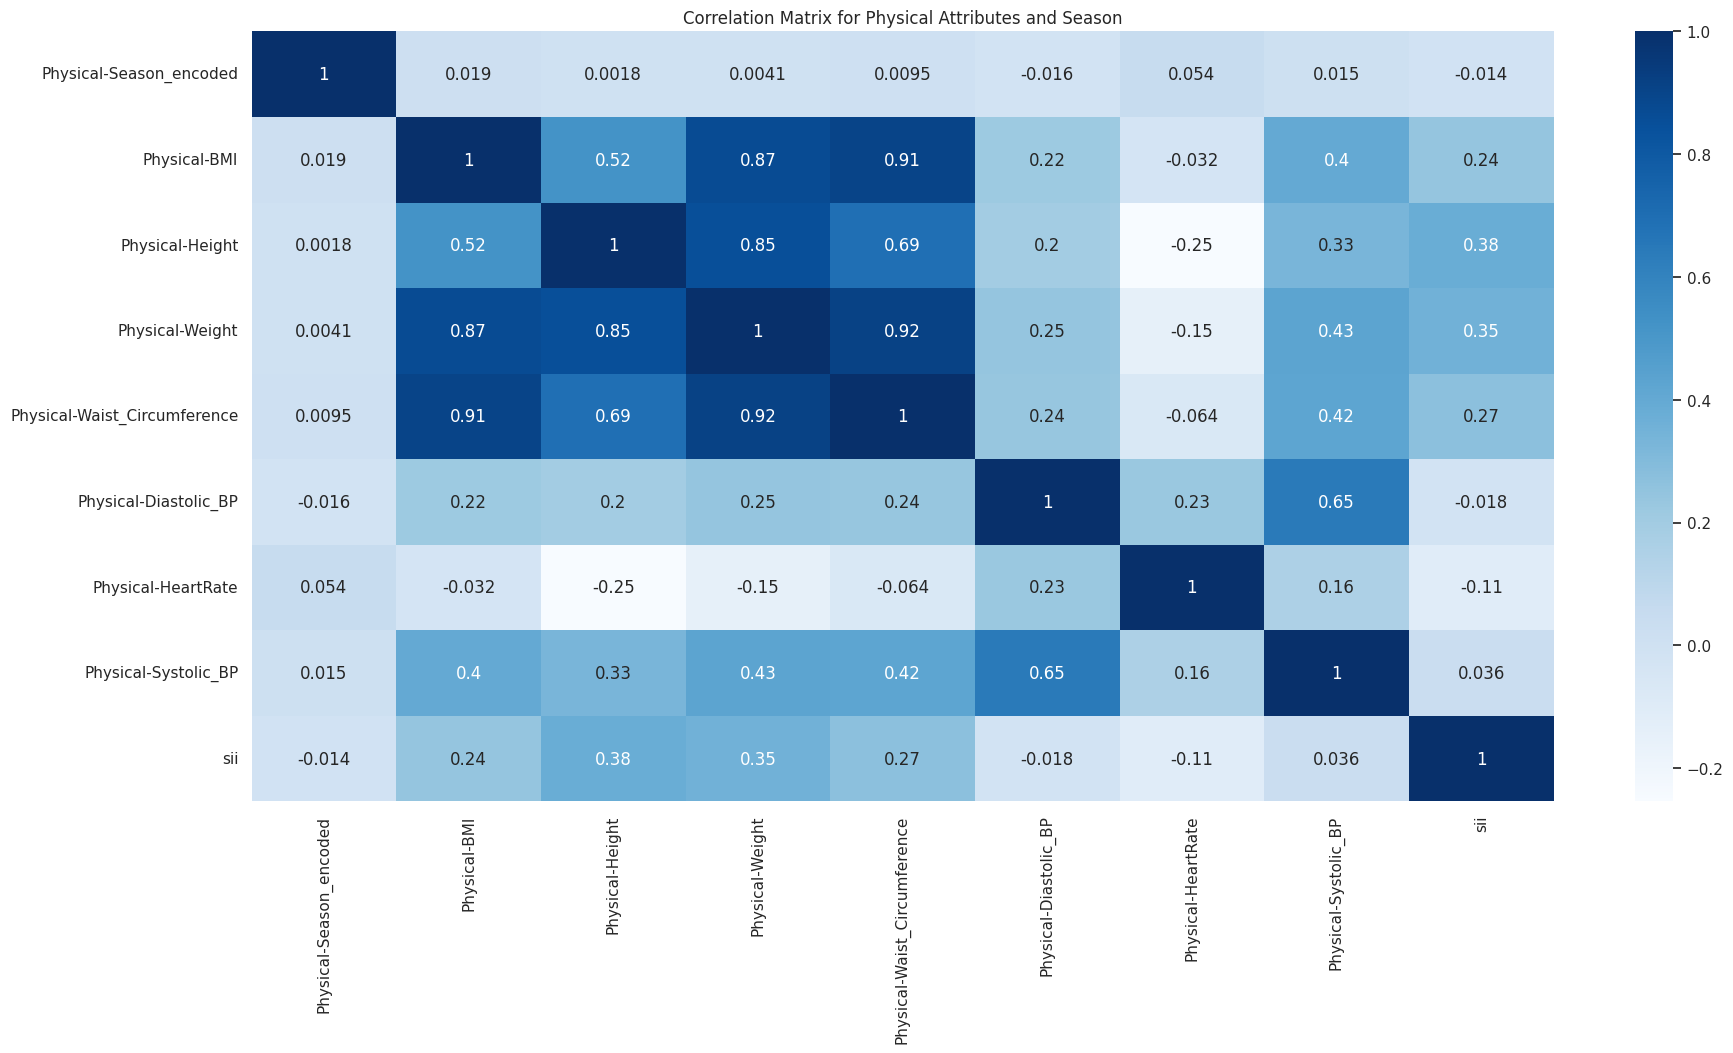

In [448]:
sns.set_theme(rc={'figure.figsize':(21,10)})
sns.heatmap(corr_physical, annot=True, cmap = "Blues")
plt.title('Correlation Matrix for Physical Attributes and Season')
plt.show()

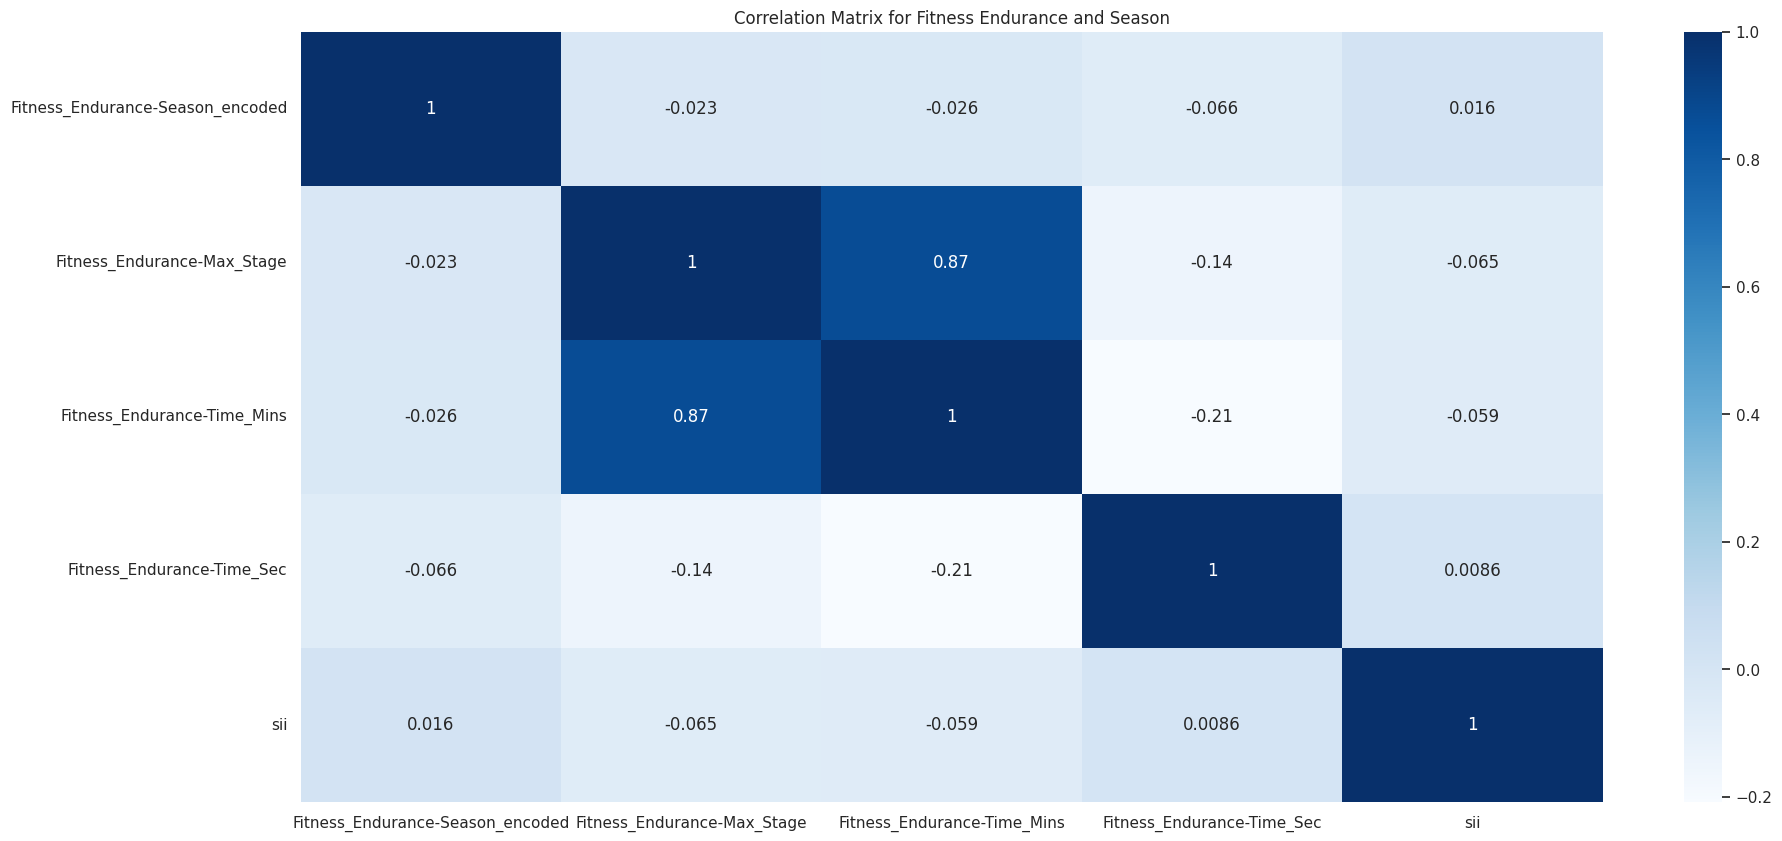

In [449]:
sns.heatmap(corr_endurance, annot=True, cmap="Blues")
plt.title('Correlation Matrix for Fitness Endurance and Season')
plt.show()

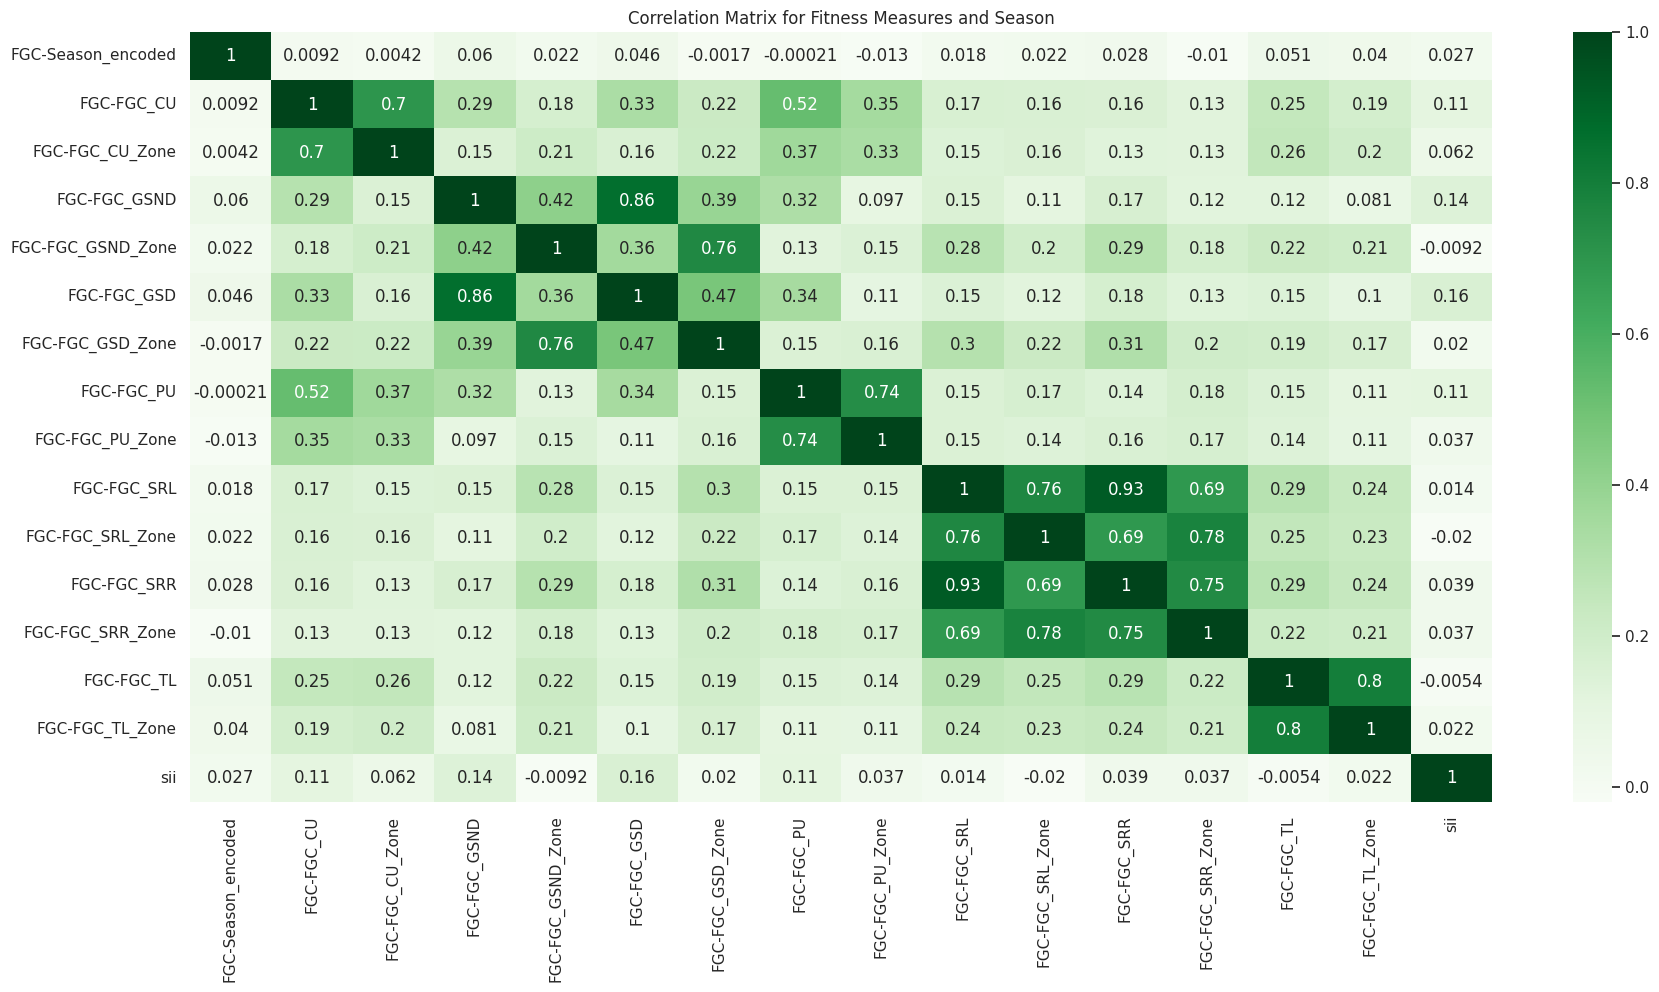

In [450]:
sns.heatmap(corr_fitness, annot=True, cmap="Greens")
plt.title('Correlation Matrix for Fitness Measures and Season')
plt.show()

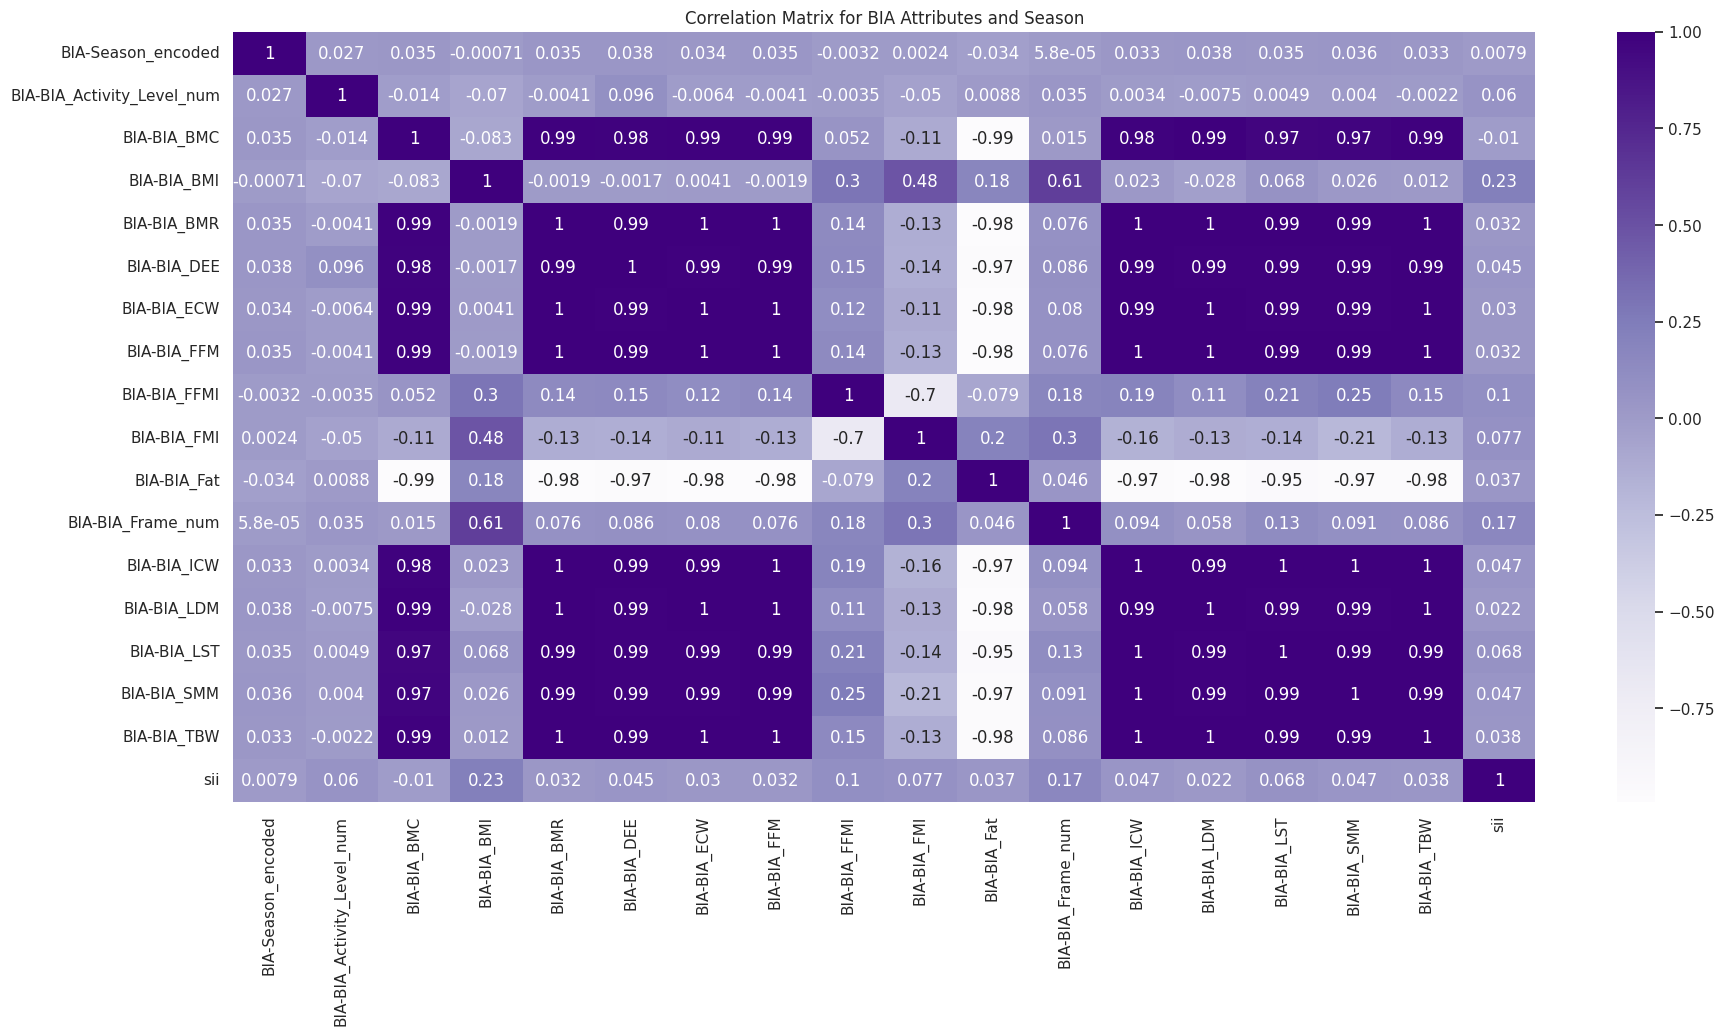

In [451]:
sns.heatmap(corr_BIA, annot=True, cmap="Purples")
plt.title('Correlation Matrix for BIA Attributes and Season')
plt.show()

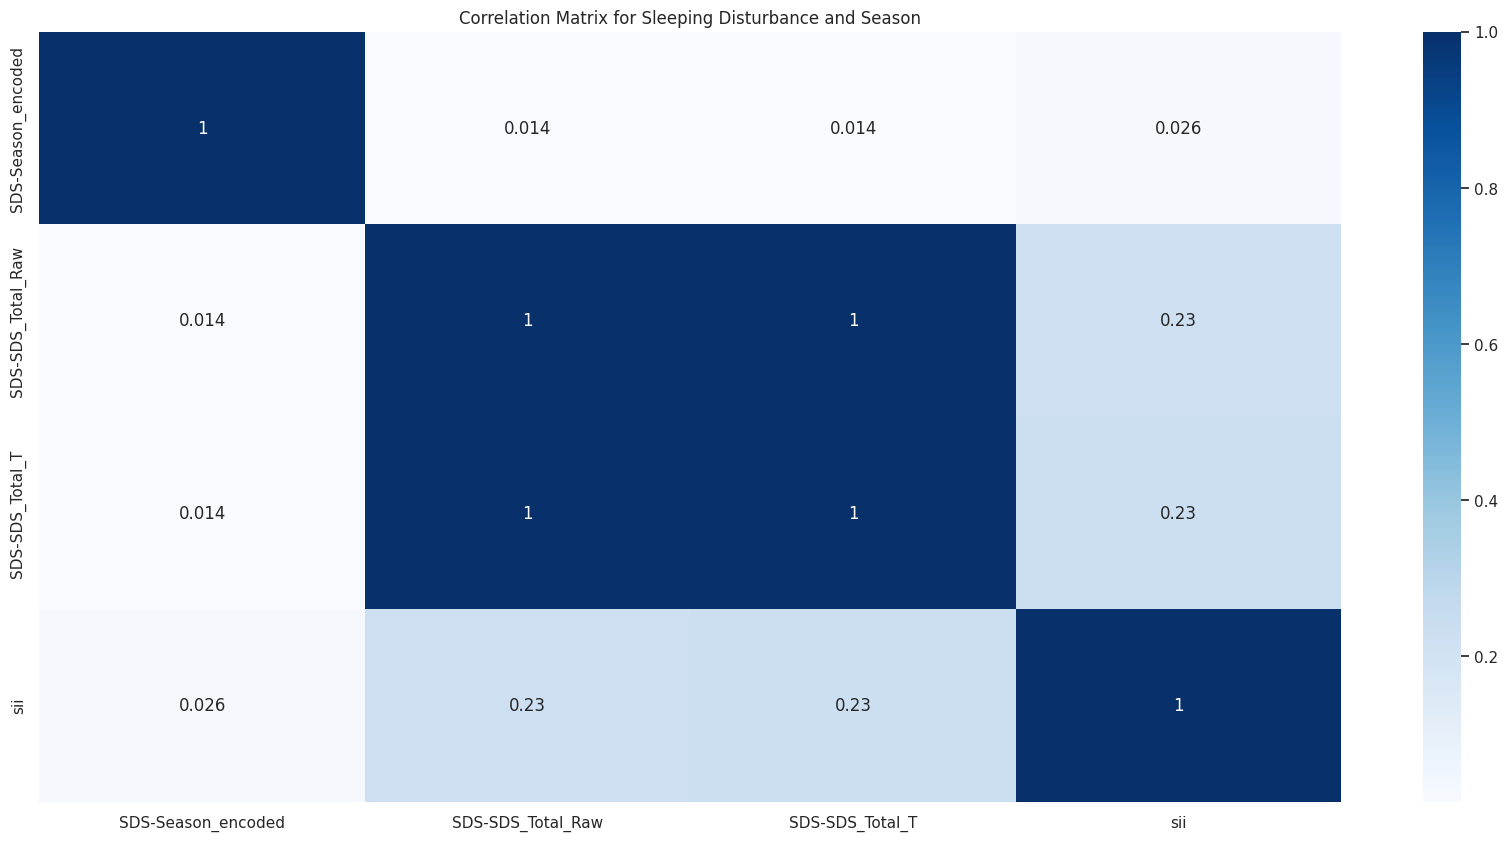

In [452]:
sns.heatmap(corr_sleep, annot=True,cmap="Blues")
plt.title('Correlation Matrix for Sleeping Disturbance and Season')
plt.show()

In [453]:
# other correlations with season
# Children's Global Assessment Scale
correlation_CGAS = df['CGAS-Season_encoded'].corr(df['CGAS-CGAS_Score'])
print(f"CGAS Correlation: {correlation_CGAS}")
# Physical Activity Questionnaire (Adolescents)
correlation_CGAS = df['PAQ_A-Season_encoded'].corr(df['CGAS-CGAS_Score'])
print(f"PAQ_A-Season_encoded Correlation: {correlation_CGAS}")
# Physical Activity Questionnaire (Children)
correlation_CGAS = df['PAQ_C-Season_encoded'].corr(df['CGAS-CGAS_Score'])
print(f"PAQ_C-Season_encoded Correlation: {correlation_CGAS}")
# Internet Use (Hours of using the internet)
correlation_CGAS = df['PreInt_EduHx-Season_encoded'].corr(df['CGAS-CGAS_Score'])
print(f"PreInt_EduHx-Season_encoded Correlation: {correlation_CGAS}")

CGAS Correlation: -0.06136714821350613
PAQ_A-Season_encoded Correlation: 0.02357402897618642
PAQ_C-Season_encoded Correlation: -0.0676087150462543
PreInt_EduHx-Season_encoded Correlation: 0.03987523908366505


In [454]:
drop_cols = ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
             'FGC-Season', 'BIA-Season', 'Fitness_Endurance-Season', 'PAQ_A-Season', 'PAQ_C-Season',
             'SDS-Season', 'PreInt_EduHx-Season', 'CGAS-Season_encoded',
             'Physical-Season_encoded', 'Fitness_Endurance-Season_encoded', 'FGC-Season_encoded',
             'BIA-Season_encoded', 'PAQ_A-Season_encoded', 'PAQ_C-Season_encoded',
             'SDS-Season_encoded', 'PreInt_EduHx-Season_encoded']
df = df.drop(columns = drop_cols, axis = 1)

## Drop the columns


In [456]:
physical_drop_col = df[['Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']]

In [457]:
endurance_drop_col = df[['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']]

In [458]:
fitness_drop_col = df[['FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL',
                       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone']]

In [459]:
BIA_drop_col = df[['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMR',
                   'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FMI',
                   'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']]

In [460]:
sleep_drop_col = df[['SDS-SDS_Total_T']]

In [461]:
df = df.drop(columns = physical_drop_col, axis = 1)
df = df.drop(columns = endurance_drop_col, axis = 1)
df = df.drop(columns = fitness_drop_col, axis = 1)
df = df.drop(columns = BIA_drop_col, axis = 1)
df = df.drop(columns = sleep_drop_col, axis = 1)

# Handling Missing Values

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              2736 non-null   int64  
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-CGAS_Score                         2342 non-null   float64
 4   Physical-BMI                            2527 non-null   float64
 5   Physical-Height                         2530 non-null   float64
 6   Physical-Weight                         2572 non-null   float64
 7   Physical-Waist_Circumference            483 non-null    float64
 8   FGC-FGC_CU                              1919 non-null   float64
 9   FGC-FGC_GSND                            872 non-null    float64
 10  FGC-FGC_GSD                             871 non-null    floa

Since there are a lot of missing values for 'PAQ_A-PAQ_A_Total' and 'Physical-Waist_Circumference', it is better to drop it then to use simple imputation.

In [463]:
col = ['PAQ_A-PAQ_A_Total', 'Physical-Waist_Circumference']
df = df.drop(columns = col, axis = 1)

We have determined the following values using R to be statistically significant to the regression:
- Basic_Demos-Age  
- Basic_Demos-Sex
- Physical-BMI
- FGC-FGC_CU
- FGC-FGC_SRL_Zone
- FGC-FGC_TL
- PreInt_EduHx-computerinternet_hoursday


There are some missing values for the Physical-BMI, PreInt_EduHx-computerinternet_hoursday data, FGC-FGC_CU, FGC-FGC_SRL_Zone, and FGC-FGC_TL. So, we will explore the following data using boxplots.

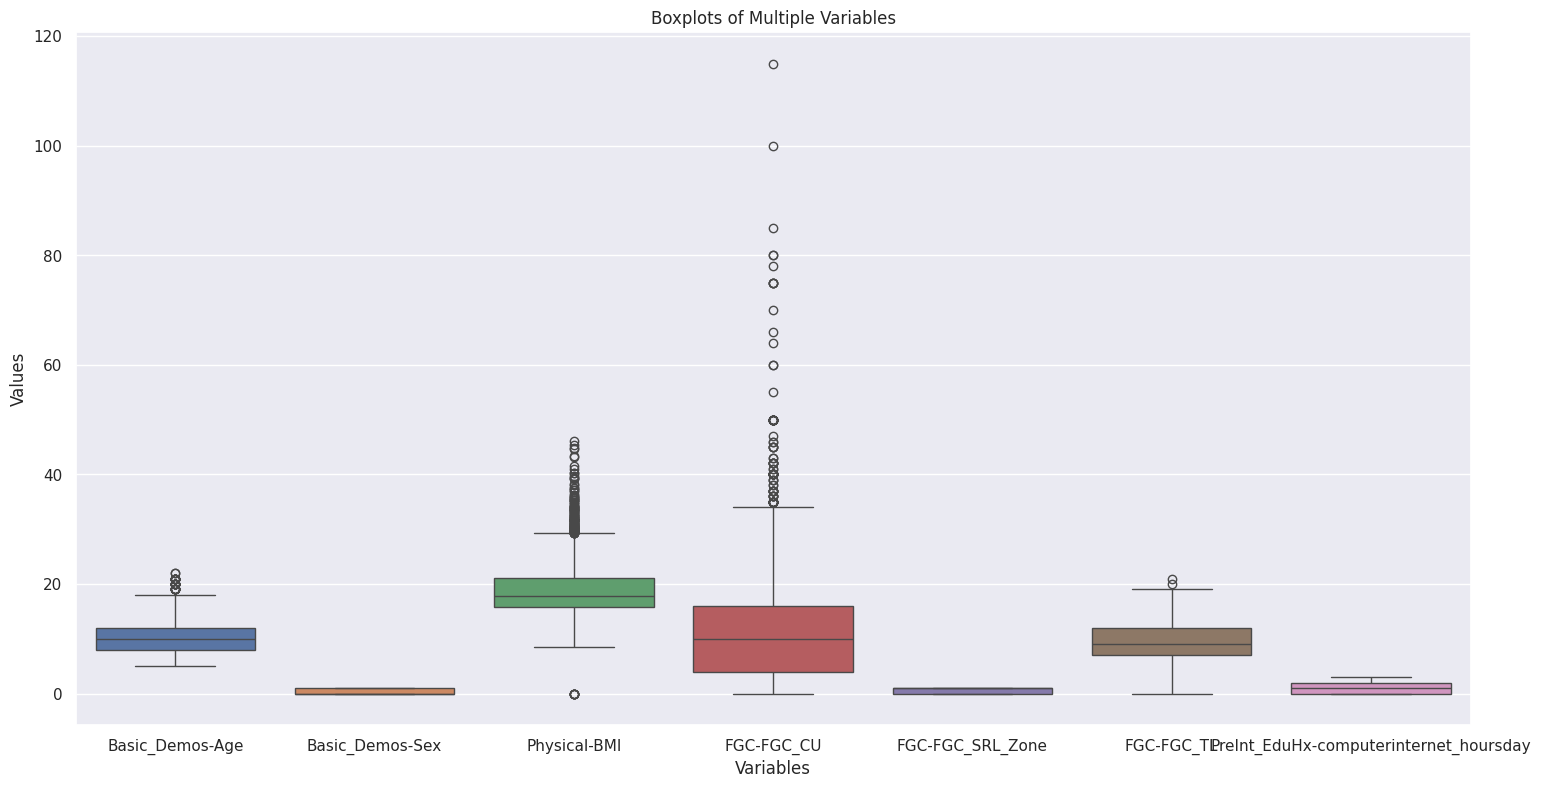

In [464]:
sns.set_theme(rc={'figure.figsize':(18,9)})
sns.boxplot(data=df[['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI', 'FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL', 'PreInt_EduHx-computerinternet_hoursday']])

plt.title('Boxplots of Multiple Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

There are a lot of outliers for the physical BMI, so we should consider using median to avoid bias due to the outliers. On the other hand, we don't have outliers for the PreInt_EduHx-computerinternet_hoursday, so we can use the mean to fill out the missing values. Furthermore, we don't have much null values to fill, so there won't be much biases when we run the logistic regression.

In [ ]:
# imputer_mean = SimpleImputer(strategy="mean")
# imputer_median = SimpleImputer(strategy="median")

# # impute FGC values
# # we are filling the rows of FGC-FGC_CU with the median
# df.loc[:, 'FGC-FGC_CU'] = imputer_median.fit_transform(df[['FGC-FGC_CU']])

# # we are filling the rows of FGC-FGC_SRL_Zone with the mean
# df.loc[:, 'FGC-FGC_SRL_Zone'] = imputer_mean.fit_transform(df[['FGC-FGC_SRL_Zone']])

# # impute physical BMI and internet usage
# # we are filling the rows of FGC-FGC_TL with the median
# df.loc[:, 'FGC-FGC_TL'] = imputer_median.fit_transform(df[['FGC-FGC_TL']])

# # impute physical BMI and internet usage
# # we are filling the rows of physical-BMI with the median
# df.loc[:, 'Physical-BMI'] = imputer_median.fit_transform(df[['Physical-BMI']])

# # we are filling the rows of PreInt_EduHx-computerinternet_hoursday with the mean
# df.loc[:, 'PreInt_EduHx-computerinternet_hoursday'] = imputer_mean.fit_transform(df[['PreInt_EduHx-computerinternet_hoursday']])

In [ ]:
# print(df['FGC-FGC_CU'].isnull().sum())
# print(df['FGC-FGC_SRL_Zone'].isnull().sum())
# print(df['FGC-FGC_TL'].isnull().sum())
# print(df['Physical-BMI'].isnull().sum())
# print(df['PreInt_EduHx-computerinternet_hoursday'].isnull().sum())

In [465]:
# Check skewness of each numerical column with missing values
skewness = df[['CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
               'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL_Zone',
               'FGC-FGC_TL', 'BIA-BIA_BMI', 'BIA-BIA_FFMI', 'BIA-BIA_Frame_num',
               'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'PreInt_EduHx-computerinternet_hoursday']].skew()
print(skewness)

CGAS-CGAS_Score                           -0.110673
Physical-BMI                               1.398169
Physical-Height                            0.296176
Physical-Weight                            1.159145
FGC-FGC_CU                                 2.230298
FGC-FGC_GSND                               2.623235
FGC-FGC_GSD                                2.181538
FGC-FGC_PU                                 1.990169
FGC-FGC_SRL_Zone                          -0.568707
FGC-FGC_TL                                -0.247077
BIA-BIA_BMI                                1.686904
BIA-BIA_FFMI                              23.375478
BIA-BIA_Frame_num                          0.372199
PAQ_C-PAQ_C_Total                          0.182456
SDS-SDS_Total_Raw                          1.079752
PreInt_EduHx-computerinternet_hoursday     0.439688
dtype: float64


In [466]:
# Columns to fill with mean (low skewness)
mean_fill_columns = ['CGAS-CGAS_Score', 'Physical-Height', 'FGC-FGC_SRL_Zone',
                     'BIA-BIA_Frame_num', 'PAQ_C-PAQ_C_Total', 'PreInt_EduHx-computerinternet_hoursday']

for column in mean_fill_columns:
    df[column] = df[column].fillna(df[column].mean())

# Columns to fill with median (high skewness)
median_fill_columns = ['Physical-BMI', 'Physical-Weight', 'FGC-FGC_CU', 'FGC-FGC_GSND',
                       'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_TL', 'BIA-BIA_BMI',
                       'BIA-BIA_FFMI', 'SDS-SDS_Total_Raw']

for column in median_fill_columns:
    df[column] = df[column].fillna(df[column].median())

In [467]:
df.isnull().sum()

,0
Unnamed: 0,0
Basic_Demos-Age,0
Basic_Demos-Sex,0
CGAS-CGAS_Score,0
Physical-BMI,0
Physical-Height,0
Physical-Weight,0
FGC-FGC_CU,0
FGC-FGC_GSND,0
FGC-FGC_GSD,0


We see that the variables are now filled with the values and we can move on to the next steps.

# Feature Importance (using linear regression)

In [468]:
print(df.dtypes)

Unnamed: 0                                  int64
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-CGAS_Score                           float64
Physical-BMI                              float64
Physical-Height                           float64
Physical-Weight                           float64
FGC-FGC_CU                                float64
FGC-FGC_GSND                              float64
FGC-FGC_GSD                               float64
FGC-FGC_PU                                float64
FGC-FGC_SRL_Zone                          float64
FGC-FGC_TL                                float64
BIA-BIA_BMI                               float64
BIA-BIA_FFMI                              float64
BIA-BIA_Frame_num                         float64
PAQ_C-PAQ_C_Total                         float64
SDS-SDS_Total_Raw                         float64
PreInt_EduHx-computerinternet_hoursday    float64
sii                                       float64


#### Test 4 features: BIA-BIA_BMI, PreInt_EduHx-computerinternet_hoursday, Physical-Height anPAQ_C-PAQ_C_Total

In [469]:
X = df[['BIA-BIA_BMI', 'PreInt_EduHx-computerinternet_hoursday', 'Physical-Height', 'PAQ_C-PAQ_C_Total']]
y = df['sii']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [470]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [471]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
print(feature_importance)

                                  Feature  Coefficient  Absolute Coefficient
1  PreInt_EduHx-computerinternet_hoursday     0.154597              0.154597
2                         Physical-Height     0.029553              0.029553
3                       PAQ_C-PAQ_C_Total     0.029166              0.029166
0                             BIA-BIA_BMI    -0.001063              0.001063


In [472]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.47315817318225056
R-squared: 0.22267832972645696


#### Test another 4 features: PreInt_EduHx-computerinternet_hoursday, PAQ_C-PAQ_C_Total, Physical-Weight and SDS-SDS_Total_Raw

In [473]:
X = df[['PreInt_EduHx-computerinternet_hoursday', 'PAQ_C-PAQ_C_Total', 'Physical-Weight', 'SDS-SDS_Total_Raw']]
y = df['sii']

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [475]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Sort by absolute coefficient values to see feature impact
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
print(feature_importance)


                                  Feature  Coefficient  Absolute Coefficient
0  PreInt_EduHx-computerinternet_hoursday     0.162681              0.162681
1                       PAQ_C-PAQ_C_Total     0.043813              0.043813
3                       SDS-SDS_Total_Raw     0.015356              0.015356
2                         Physical-Weight     0.003897              0.003897


In [476]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.4645411174594985
R-squared: 0.23683474617848732


In [477]:
import statsmodels.api as sm

# Select Basic_Demos-Age as the predictor and add a constant for the intercept
X = df[['Basic_Demos-Age']]
X = sm.add_constant(X)  # Adds an intercept term to the model
y = df['sii']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sii   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     422.9
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.74e-87
Time:                        19:04:31   Log-Likelihood:                -2973.9
No. Observations:                2736   AIC:                             5952.
Df Residuals:                    2734   BIC:                             5964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2625      0.043     

In [ ]:
# Select PreInt_EduHx-computerinternet_hoursday as the predictor and add a constant for the intercept
X = df[['PreInt_EduHx-computerinternet_hoursday']]
X = sm.add_constant(X)
y = df['sii']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sii   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     337.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           4.48e-71
Time:                        18:43:51   Log-Likelihood:                -3011.6
No. Observations:                2736   AIC:                             6027.
Df Residuals:                    2734   BIC:                             6039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
X = df[['PAQ_C-PAQ_C_Total']]
X = sm.add_constant(X)
y = df['sii']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sii   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04650
Date:                Sun, 27 Oct 2024   Prob (F-statistic):              0.829
Time:                        18:43:51   Log-Likelihood:                -3170.6
No. Observations:                2736   AIC:                             6345.
Df Residuals:                    2734   BIC:                             6357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5660      0.06

In [ ]:
X = df[['SDS-SDS_Total_Raw']]
X = sm.add_constant(X)
y = df['sii']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sii   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           4.70e-31
Time:                        18:43:51   Log-Likelihood:                -3103.4
No. Observations:                2736   AIC:                             6211.
Df Residuals:                    2734   BIC:                             6223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1197      0.06

In [478]:

X = df[['Basic_Demos-Sex']]
X = sm.add_constant(X)
y = df['sii']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sii   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     27.70
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.53e-07
Time:                        19:08:25   Log-Likelihood:                -3156.8
No. Observations:                2736   AIC:                             6318.
Df Residuals:                    2734   BIC:                             6329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6389      0.018     

# Multinomial Logistic Regression
### We are considering the four most important* variables for the logistic regression: Age, Gender, BMI, and Internet hours

In [ ]:
x = df[['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI', 'PreInt_EduHx-computerinternet_hoursday']] # copy dataset df for only the four columns to x

In [ ]:
# separate into training set and test set
y = df['sii']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
# Initialize logistic regression
lr = LogisticRegression(max_iter=10000, class_weight='balanced')
lr.fit(x_train, y_train)
print(np.exp(lr.coef_))

[[0.80298698 1.71435139 0.96580732 0.69644686]
 [0.9537181  1.2317192  0.97906583 0.91417749]
 [1.05788521 0.79893182 0.97423571 1.14883027]
 [1.23433467 0.59275977 1.08550936 1.36717976]]


In [ ]:
prob = np.exp(lr.coef_)
pd.DataFrame(prob, x.columns, columns=['none', 'mild', 'moderate', 'severe'])

,none,mild,moderate,severe
Basic_Demos-Age,0.802987,1.714351,0.965807,0.696447
Basic_Demos-Sex,0.953718,1.231719,0.979066,0.914177
Physical-BMI,1.057885,0.798932,0.974236,1.148830
PreInt_EduHx-computerinternet_hoursday,1.234335,0.592760,1.085509,1.367180


For gender, it is represented by a binary integer; 0 for male and 1 for female. An increase of 1 in the gender to one means that it is [TBA] more likely that the children do not have indication of severe internet usage, so if the child is female, then they are [TBA] more likely than male to not have indication of severe internet usage.

The coefficients represent the likelihood that the feature is in the target class given the value of the variables. For every one-unit increase in the physical BMI, it is [TBA] times more likely that the youth doesn't have no indication of severe internet usage.

In [ ]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76       336
         1.0       0.35      0.19      0.25       131
         2.0       0.23      0.26      0.25        72
         3.0       0.10      0.89      0.18         9

    accuracy                           0.54       548
   macro avg       0.37      0.52      0.36       548
weighted avg       0.60      0.54      0.56       548



For hours/day, we consider only the range of 0 to 3 that represents:
- 0=Less than 1h/day
- 1=Around 1h/day
- 2=Around 2hs/day
- 3=More than 3hs/day

In [ ]:
age = input("Enter Age: ")
gender = input("Enter Gender (1 for female): ")
Physical_BMI = input("Enter BMI: ")
internetUsage = input("Enter hours/day of using internet: ")

Enter Age: 1
Enter Gender (1 for female): 1
Enter BMI: 20
Enter hours/day of using internet: 3


In [ ]:
instance = pd.DataFrame({
    'Basic_Demos-Age' : [age],
    'Basic_Demos-Sex' : [gender],
    'Physical-BMI' : [Physical_BMI],
    'PreInt_EduHx-computerinternet_hoursday' : [internetUsage]
})

lr.predict(instance)

array([0.])

# Elementary School Students Age Group (5-11) - Logistic Regression

##Prepare Data for Elementary Group

In [500]:
elementary_df = df[(df['Basic_Demos-Age'] >= 5) & (df['Basic_Demos-Age'] <= 11)]

###Define the Target Variables: Strict Case and Soft Case



In [501]:
# Strict case: Any level of risk (sii >= 1) is classified as 1, otherwise 0
df_strict = elementary_df['sii'].apply(lambda x: 1 if x >= 1 else 0)

# Soft case: Higher risk threshold (sii >= 2) is classified as 1, otherwise 0
df_soft = elementary_df['sii'].apply(lambda x: 1 if x >= 2 else 0)


In [502]:
print(elementary_df.head())
print(df_strict.value_counts())
print(df_soft.value_counts())

   Unnamed: 0  Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  \
0           0                5                0        51.000000   
1           1                9                0        65.159266   
2           2               10                1        71.000000   
3           3                9                0        71.000000   
5           5               10                0        65.159266   

   Physical-BMI  Physical-Height  Physical-Weight  FGC-FGC_CU  FGC-FGC_GSND  \
0     16.877316             46.0             50.8         0.0          19.4   
1     14.035590             48.0             46.0         3.0          19.4   
2     16.648696             56.5             75.6        20.0          10.2   
3     18.292347             56.0             81.6        18.0          19.4   
5     19.660760             55.0             84.6         9.0          19.4   

   FGC-FGC_GSD  FGC-FGC_PU  FGC-FGC_SRL_Zone  FGC-FGC_TL  BIA-BIA_BMI  \
0         20.8         0.0               0.

##Feature Engineering and Data Preparation

In [503]:
# Feature Engineering for FGC_Average (if not already done)
elementary_df['FGC_Average'] = elementary_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis=1)


X = elementary_df[['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI',
                   'PreInt_EduHx-computerinternet_hoursday', 'FGC_Average']]

y = df_strict


<ipython-input-503-93dc9445e0cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elementary_df['FGC_Average'] = elementary_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis=1)


In [507]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [508]:
y_pred = lr.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7131367292225201
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       267
           1       0.49      0.22      0.30       106

    accuracy                           0.71       373
   macro avg       0.62      0.56      0.56       373
weighted avg       0.67      0.71      0.67       373



In [509]:
odds_ratios = np.exp(lr.coef_)
print("Odds Ratios:\n", odds_ratios)


Odds Ratios:
 [[1.33438039 0.55157566 1.01349814 1.53759687 1.02275367]]


##Soft Case

In [510]:
y = df_soft

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [511]:
y_pred = lr.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.935656836461126
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       349
           1       0.00      0.00      0.00        24

    accuracy                           0.94       373
   macro avg       0.47      0.50      0.48       373
weighted avg       0.88      0.94      0.90       373



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [512]:
odds_ratios = np.exp(lr.coef_)
print("Odds Ratios:\n", odds_ratios)

Odds Ratios:
 [[1.2577893  0.38502375 1.04042092 1.55262672 1.02303865]]


# Middle School Students Age Group (12-17) - Logistic Regression

In [479]:
middle_df = df[(df['Basic_Demos-Age'] >= 12) & (df['Basic_Demos-Age'] <= 17)]

In [480]:
df_strict = middle_df['sii'].apply(lambda x: 1 if x >= 1 else 0)
df_soft = middle_df['sii'].apply(lambda x: 1 if x >= 2 else 0)

## Strict Case

**We'll first consider the case where we strictly determine that more than or equal to one means a severe usage of internet, otherwise it's not severe.**

We are creating a new feature by averaging several related columns. These related columns are statistically significant as calculated through R logistic regression. **TBA: add R solution**

By averaging these columns, we reduce the complexity and consider the factors further. For example, some participants may not do curl up, but some of them did sit & reach better, and so on... This helps the model focus on the general trend rather than individual fluctuations. This also prevents collinearity, where highly correlated features can cause instability in the model's prediction.

In [481]:
# Feature Engineering for FGC
middle_df['FGC_Average'] = middle_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis = 1)

# Consider weighing the internet usage variable
middle_df['PreInt_EduHx-computerinternet_hoursday'] = middle_df['PreInt_EduHx-computerinternet_hoursday'].replace(3,6)

<ipython-input-481-54dba7e80b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['FGC_Average'] = middle_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis = 1)
<ipython-input-481-54dba7e80b06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['PreInt_EduHx-computerinternet_hoursday'] = middle_df['PreInt_EduHx-computerinternet_hoursday'].replace(3,6)


In [482]:
# The features and the target columns:
x = middle_df[['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI',
        'PreInt_EduHx-computerinternet_hoursday', 'FGC_Average']]
y = df_strict

In [483]:
x.describe()

,Basic_Demos-Age,Basic_Demos-Sex,Physical-BMI,PreInt_EduHx-computerinternet_hoursday,FGC_Average
count,791.000000,791.000000,791.000000,791.000000,791.000000
mean,13.949431,0.391909,21.548887,2.109257,9.170520
std,1.655821,0.488485,5.371700,2.010013,4.539473
min,12.000000,0.000000,0.000000,0.000000,0.500000
25%,12.000000,0.000000,17.819010,1.000000,6.545551
50%,14.000000,0.000000,20.227412,2.000000,7.666667
75%,15.000000,1.000000,24.058871,2.000000,11.166667
max,17.000000,1.000000,46.102914,6.000000,31.666667


In [489]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
# Initialize logistic regression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
print(np.exp(lr.coef_))
print(classification_report(y_test, lr.predict(x_test)))

[[0.99597784 0.69257162 0.99010755 1.24803961 1.06716785]]
              precision    recall  f1-score   support

           0       0.56      0.15      0.24        60
           1       0.64      0.93      0.76        99

    accuracy                           0.64       159
   macro avg       0.60      0.54      0.50       159
weighted avg       0.61      0.64      0.56       159



The accuracy is 0.70. which is not that good, but way better than the multinomial case.

In [488]:
confusion_matrix(y_test, lr.predict(x_test))

array([[ 9, 51],
       [ 7, 92]])

### Instance Test

Since we use feature engineering to calculate the FGC, we can ask the users for a percentage of how confident they are at performing curl-up, truck lift, and sit & reach.

In [ ]:
age = input("Enter Age: ")
gender = input("Enter Gender (1 for female): ")
Physical_BMI = input("Enter BMI: ")
FGC = input("Enter percentage of how confident you are at fitness test: ")
internetUsage = input("Enter hours/day of using internet: ")

In [ ]:
# change the FGC value
FGC = float(FGC)
FGC = df['FGC_Average'].max() * (FGC / 100)

In [ ]:
instance = pd.DataFrame({
    'Basic_Demos-Age' : [age],
    'Basic_Demos-Sex' : [gender],
    'Physical-BMI' : [Physical_BMI],
    'PreInt_EduHx-computerinternet_hoursday' : [internetUsage],
    'FGC_Average' : [FGC]
})

lr.predict(instance)

## Softer Case

In [490]:
# The features and the target columns:
x = middle_df[['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI',
        'PreInt_EduHx-computerinternet_hoursday', 'FGC_Average']]
y = df_soft

In [491]:
x.describe()

,Basic_Demos-Age,Basic_Demos-Sex,Physical-BMI,PreInt_EduHx-computerinternet_hoursday,FGC_Average
count,791.000000,791.000000,791.000000,791.000000,791.000000
mean,13.949431,0.391909,21.548887,2.109257,9.170520
std,1.655821,0.488485,5.371700,2.010013,4.539473
min,12.000000,0.000000,0.000000,0.000000,0.500000
25%,12.000000,0.000000,17.819010,1.000000,6.545551
50%,14.000000,0.000000,20.227412,2.000000,7.666667
75%,15.000000,1.000000,24.058871,2.000000,11.166667
max,17.000000,1.000000,46.102914,6.000000,31.666667


In [492]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
# Initialize logistic regression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
print(np.exp(lr.coef_))
print(classification_report(y_test, lr.predict(x_test)))

[[1.11436563 0.60739552 0.99936024 1.18744276 1.0146112 ]]
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       107
           1       0.80      0.08      0.14        52

    accuracy                           0.69       159
   macro avg       0.74      0.53      0.48       159
weighted avg       0.72      0.69      0.59       159



### Instance Test

In [ ]:
age = input("Enter Age: ")
gender = input("Enter Gender (1 for female): ")
Physical_BMI = input("Enter BMI: ")
FGC = input("Enter percentage of how confident you are at fitness test: ")
internetUsage = input("Enter hours/day of using internet: ")

In [ ]:
# change the FGC value
FGC = float(FGC)
FGC = df['FGC_Average'].max() * (FGC / 100)

In [ ]:
instance = pd.DataFrame({
    'Basic_Demos-Age' : [age],
    'Basic_Demos-Sex' : [gender],
    'Physical-BMI' : [Physical_BMI],
    'PreInt_EduHx-computerinternet_hoursday' : [internetUsage],
    'FGC_Average' : [FGC]
})

lr.predict(instance)

# College (18-22) - Logistic Regression

In [493]:
college_df = df[(df['Basic_Demos-Age'] >= 18) & (df['Basic_Demos-Age'] <= 22)]

In [494]:
df_strict = college_df['sii'].apply(lambda x: 1 if x >= 1 else 0)
df_soft = college_df['sii'].apply(lambda x: 1 if x >= 2 else 0)

In [495]:
# Feature Engineering for FGC
college_df['FGC_Average'] = college_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis = 1)

# Consider weighing the internet usage variable
college_df['PreInt_EduHx-computerinternet_hoursday'] = college_df['PreInt_EduHx-computerinternet_hoursday'].replace(3,6)

<ipython-input-495-f323f6e6668a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df['FGC_Average'] = college_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis = 1)
<ipython-input-495-f323f6e6668a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df['PreInt_EduHx-computerinternet_hoursday'] = college_df['PreInt_EduHx-computerinternet_hoursday'].replace(3,6)


### Strict Case

In [497]:
# The features and the target columns:
x = college_df[['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI',
        'PreInt_EduHx-computerinternet_hoursday', 'FGC_Average']]
y = df_strict
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
# Initialize logistic regression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
print(np.exp(lr.coef_))
print(classification_report(y_test, lr.predict(x_test)))

[[0.88597347 0.79928483 0.98458537 1.29333118 0.95786986]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.73      0.85      0.79        13

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



## Soft Case

In [498]:
# Feature Engineering for FGC
college_df['FGC_Average'] = college_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis = 1)

# Consider weighing the internet usage variable
college_df['PreInt_EduHx-computerinternet_hoursday'] = college_df['PreInt_EduHx-computerinternet_hoursday'].replace(3,6)

<ipython-input-498-f323f6e6668a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df['FGC_Average'] = college_df[['FGC-FGC_CU', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL']].mean(axis = 1)
<ipython-input-498-f323f6e6668a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df['PreInt_EduHx-computerinternet_hoursday'] = college_df['PreInt_EduHx-computerinternet_hoursday'].replace(3,6)


In [499]:
# The features and the target columns:
x = college_df[['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI',
        'PreInt_EduHx-computerinternet_hoursday', 'FGC_Average']]
y = df_soft
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
# Initialize logistic regression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
print(np.exp(lr.coef_))
print(classification_report(y_test, lr.predict(x_test)))

[[0.66745801 0.57772954 0.90294995 1.30174431 0.8637674 ]]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.50      0.17      0.25         6

    accuracy                           0.65        17
   macro avg       0.58      0.54      0.51        17
weighted avg       0.61      0.65      0.59        17

